In [2]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pickle.load(open('../datasets/base_dataset.pickle', 'rb'))
data.keys()

dict_keys(['person_id', 'features', 'labels'])

In [4]:
df = pd.DataFrame(data)
df

,person_id,features,labels
0,partial_4a6e010ee2.pickle,"[0.7095352411270142, 0.6480891704559326, -6.29...",A
1,partial_4a6e010ee2.pickle,"[0.7491138577461243, 0.6612861156463623, -4.91...",A
2,partial_4a6e010ee2.pickle,"[0.6612380146980286, 0.9213589429855347, -3.07...",A
3,partial_4a6e010ee2.pickle,"[0.879940390586853, 0.5839366316795349, -6.078...",A
4,partial_4a6e010ee2.pickle,"[0.30158907175064087, 0.5855748653411865, -1.0...",A
...,...,...,...
5796,partial_49bd9a470f.pickle,"[0.15672987699508667, 0.785681962966919, -5.22...",Y
5797,partial_49bd9a470f.pickle,"[0.5156242251396179, 0.4834107756614685, -4.41...",Y
5798,partial_49bd9a470f.pickle,"[0.3380160927772522, 0.5076223611831665, -3.27...",Y
5799,partial_49bd9a470f.pickle,"[0.4358025789260864, 0.5254104733467102, -3.39...",Y


In [5]:
id = "partial_3fcd5fdc56.pickle"
roberto = df[df["person_id"] == id]

In [6]:
hand_b = (list(roberto[roberto["labels"] == "B"].head(1)["features"]))[0]

In [7]:
x = [] 
y = []
for i in range(0, len(hand_b)-1, 3):
    x.append(hand_b[i])
    y.append(hand_b[i+1])


(0.0, 1.0)

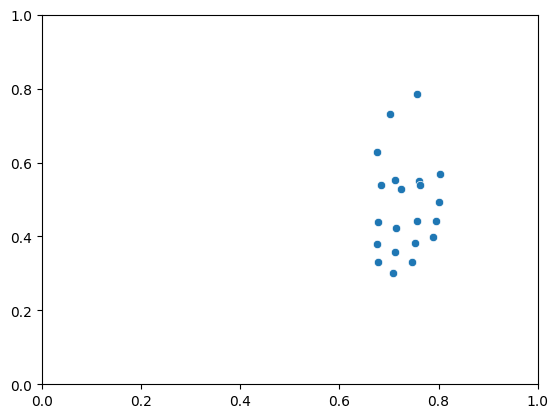

In [8]:
fig, ax = plt.subplots()
sns.scatterplot(x=x, y=y, )
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Confusion matrix

In [9]:
import joblib
from transformations import minimum, geometric, minimum2D, geometric2D
from sklearn.metrics import recall_score, make_scorer
import numpy as np
from LibrasModel import LibrasModel, weighted_accuracy_score, weighted_accuracy_scorer

In [10]:
base_model = joblib.load("best_model.sav")
model = LibrasModel(base_model, has_z=False)

In [11]:
test_data = pickle.load(open('TrainTestData/test_data.pickle', 'rb'))

In [12]:
X = np.array(test_data["features"])
y_pred = model.predict(X)
y_true = test_data["labels"]

In [13]:
weighted_accuracy_score(y_true, y_pred)

0.9794405040918869

In [14]:
y_true

['C',
 'U',
 'W',
 'P',
 'N',
 'A',
 'R',
 'F',
 'S',
 'U',
 'L',
 'L',
 'G',
 'Y',
 'A',
 'C',
 'O',
 'R',
 'L',
 'Y',
 'C',
 'M',
 'R',
 'E',
 'A',
 'W',
 'U',
 'Y',
 'S',
 'N',
 'M',
 'V',
 'W',
 'V',
 'M',
 'S',
 'O',
 'D',
 'M',
 'R',
 'B',
 'W',
 'B',
 'L',
 'W',
 'T',
 'I',
 'C',
 'C',
 'M',
 'D',
 'W',
 'T',
 'F',
 'G',
 'M',
 'F',
 'G',
 'P',
 'D',
 'P',
 'B',
 'N',
 'A',
 'B',
 'R',
 'I',
 'L',
 'T',
 'F',
 'E',
 'G',
 'P',
 'C',
 'Y',
 'G',
 'C',
 'W',
 'U',
 'Q',
 'I',
 'D',
 'V',
 'W',
 'A',
 'N',
 'Q',
 'V',
 'W',
 'D',
 'G',
 'O',
 'D',
 'B',
 'G',
 'V',
 'R',
 'L',
 'I',
 'I',
 'W',
 'C',
 'E',
 'U',
 'V',
 'D',
 'L',
 'L',
 'P',
 'D',
 'B',
 'N',
 'M',
 'F',
 'Y',
 'S',
 'N',
 'E',
 'N',
 'M',
 'R',
 'S',
 'I',
 'A',
 'I',
 'M',
 'F',
 'M',
 'B',
 'G',
 'N',
 'F',
 'M',
 'D',
 'R',
 'V',
 'U',
 'I',
 'R',
 'C',
 'N',
 'S',
 'V',
 'C',
 'C',
 'A',
 'O',
 'C',
 'E',
 'Q',
 'N',
 'E',
 'U',
 'A',
 'L',
 'L',
 'E',
 'W',
 'R',
 'Y',
 'F',
 'C',
 'A',
 'T',
 'P',
 'O',
 'P'

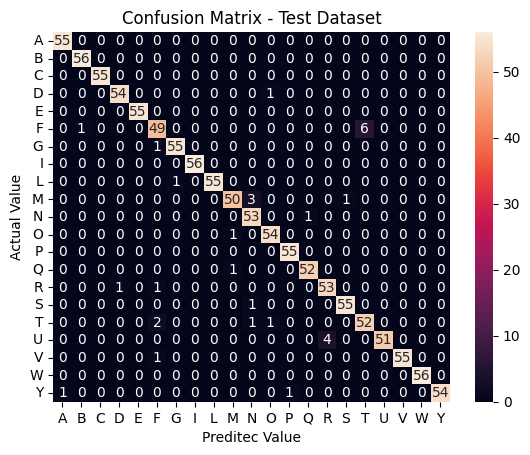

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Preditec Value');ax.set_ylabel('Actual Value'); 
ax.set_title('Confusion Matrix - Test Dataset'); 
labels = np.array(data["labels"])
letters = np.unique(labels)
ax.xaxis.set_ticklabels(letters); ax.yaxis.set_ticklabels(letters);

In [16]:
fig = ax.get_figure()
fig.savefig("confusion_matix.png") 

## Analysing results of transformations

In [17]:
from copy import deepcopy
from LibrasModel import weighted_accuracy_score
from time import time

In [18]:
data_path = "TrainTestData/train_data.pickle"
train_data = pickle.load(open(data_path, "rb"))
test_data = pickle.load(open('TrainTestData/test_data.pickle', 'rb'))

In [19]:
# we have to retrain the model every time, since the data changes
# since the LibrasModel pipeline applies the transformations, we have to apply everything by hand
transformations = [model.centralize, model.fix_hand, model.to_2d]
names = ["centralize", "fix hand", "2D"]
svm = model.model
X_train = np.array(train_data["features"])
y_train = np.array(train_data["labels"])
X_test = np.array(test_data["features"])
y_test = np.array(test_data["labels"])
def print_results(aux):
    X_train_copy = deepcopy(X_train)
    X_test_copy = deepcopy(X_test)
    local_names = []
    for i in range(3):
        if aux[i] == 0:
            continue
        X_train_copy = transformations[i](X_train_copy)
        X_test_copy = transformations[i](X_test_copy)
        local_names.append(names[i])
    svm.fit(X_train_copy, y_train)
    y_pred = svm.predict(X_test_copy)
    print(local_names, weighted_accuracy_score(y_test, y_pred))

def chose_trans(aux, i):
    if i == len(aux):
        print_results(aux)
        return
    aux[i] = 0
    chose_trans(aux, i+1)
    aux[i] = 1
    chose_trans(aux, i+1)

chose_trans([0, 0, 0], 0)


[] 0.8418104356420829
['2D'] 0.8399689500525176
['fix hand'] 0.8418104356420829
['fix hand', '2D'] 0.8402743410261113
['centralize'] 0.97017622671445
['centralize', '2D'] 0.9730655397112898
['centralize', 'fix hand'] 0.977404884186758
['centralize', 'fix hand', '2D'] 0.9794405040918869
